In [1]:
# Importing required libraries

import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
import regex as re

In [2]:
# Reading data

df = pd.read_csv('/content/email_spam.csv', encoding='ISO-8859-1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5387,ham,I will be gentle baby! Soon you will be taking...,NaN,NaN,NaN
1052,ham,I got another job! The one at the hospital doi...,NaN,NaN,NaN
2570,ham,From 5 to 2 only my work timing.,NaN,NaN,NaN
2522,ham,Dunno lei... I might b eatin wif my frens... I...,NaN,NaN,NaN
105,ham,Thanks a lot for your wishes on my birthday. T...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

## 1. Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# drop last 3 cols

#df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
nltk.download('stopwords')  ## Stop the unused words
                            ## Stop words are words that are so common they are basically ignored by typical tokenizers.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1555,ham,Ok i found dis pierre cardin one which looks n...,NaN,NaN,NaN
548,ham,Wait &lt;#&gt; min..,NaN,NaN,NaN
4484,ham,What not under standing.,NaN,NaN,NaN
2775,ham,We confirm eating at esplanade?,NaN,NaN,NaN
4532,spam,Gr8 new service - live sex video chat on your ...,NaN,NaN,NaN


In [9]:
# renaming the cols

df.rename(columns={'v1':'label','v2':'message'},inplace=True)
df.sample(5)

,label,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
3100,ham,Pathaya enketa maraikara pa',NaN,NaN,NaN
2429,spam,Guess who am I?This is the first time I create...,NaN,NaN,NaN
2679,spam,"New Tones This week include: 1)McFly-All Ab..,...",NaN,NaN,NaN
5057,ham,"Geeeee ... Your internet is really bad today, ...",NaN,NaN,NaN
5188,ham,Okie,NaN,NaN,NaN


In [10]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()    # To encode the column as numerical

In [11]:
df['label'] = encoder.fit_transform(df['label'])

In [12]:
df.head()

,label,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [13]:
# Checking missing values

df.isnull().sum()

,0
label,0
message,0
Unnamed: 2,5522
Unnamed: 3,5560
Unnamed: 4,5566


In [14]:
# checking for duplicate values

df.duplicated().sum()

403

In [15]:
# remove duplicates

df = df.drop_duplicates(keep='first')

In [16]:
# Shape of the data

df.shape

(5169, 5)

In [17]:
# Classes of the output column

df['label'].value_counts()

,count
label,
0,4516
1,653


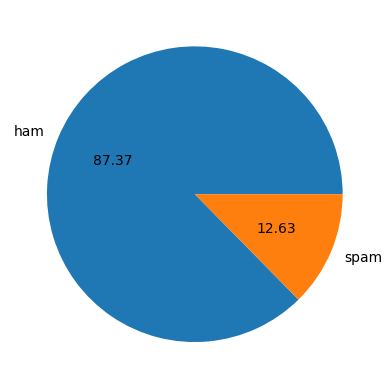

In [18]:
# Pie chart


plt.pie(df['label'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

Report:

Label is imbalanced

In [19]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [20]:
## Getting number of characters in each message

df['num_characters'] = df['message'].apply(len)

In [23]:
# Getting the number of words

df['num_words'] = df['message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [25]:
## Getting umber of sentences in each message using "punkt"

df['num_sentences'] = df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [26]:
df.head()

,label,message,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111,24,2
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155,37,2
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61,15,1


In [27]:
# Description of the numerical data

df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
# Getting description of ham

df[df['label'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
#  Getting description of spam

df[df['label'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

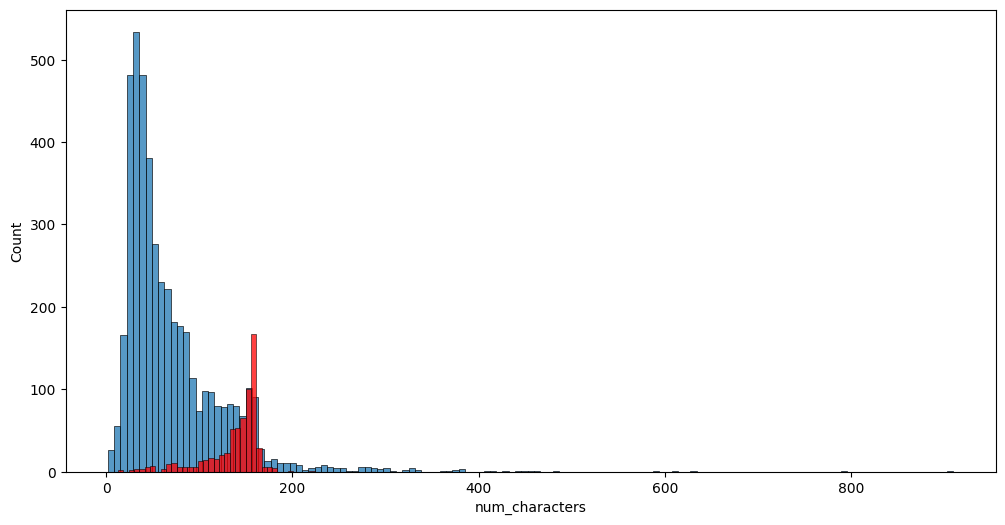

In [30]:
# Histogram for num_characters with respect to classes in label column

plt.figure(figsize=(12,6))
sns.histplot(df[df['label'] == 0]['num_characters'])
sns.histplot(df[df['label'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

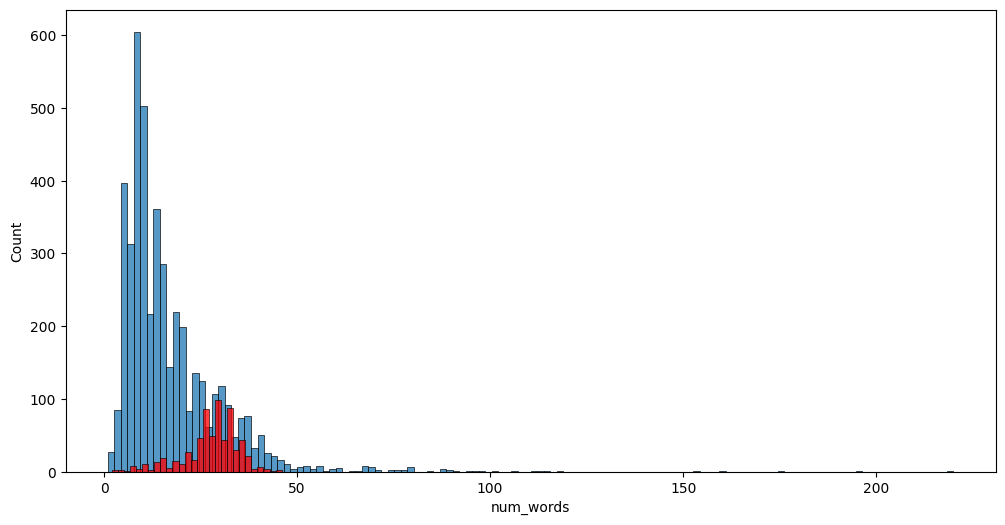

In [31]:
# Histogram for num_words with respect to classes in label column

plt.figure(figsize=(12,6))
sns.histplot(df[df['label'] == 0]['num_words'])
sns.histplot(df[df['label'] == 1]['num_words'],color='red')

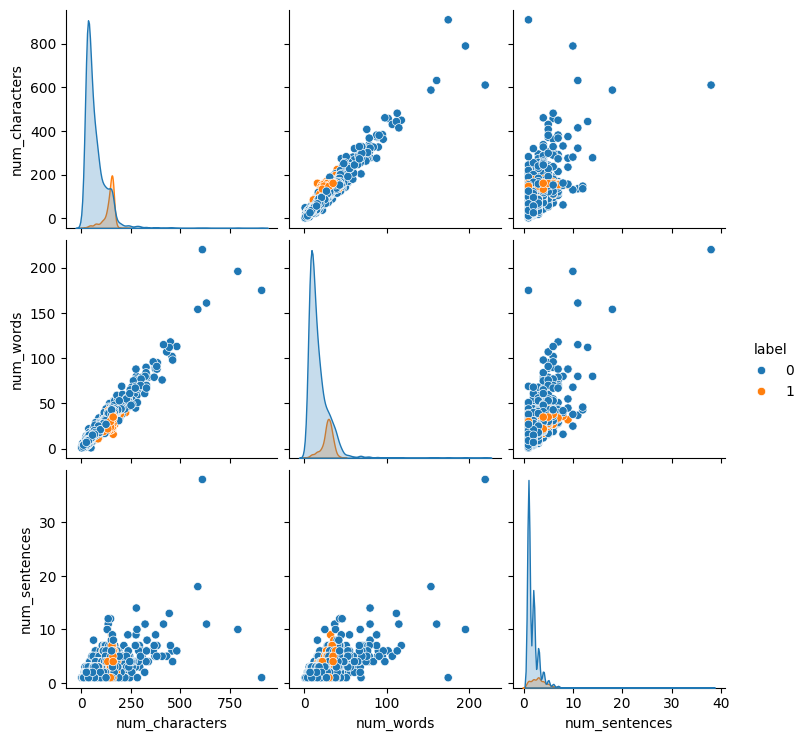

In [32]:
# Pair-plot

sns.pairplot(df,hue='label')

In [34]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
import string
from nltk.stem.porter import PorterStemmer

In [36]:
ps = PorterStemmer()

In [37]:
df['message'][18]

'Fine if thatåÕs the way u feel. ThatåÕs the way its gota b'

In [38]:
def transform_text(text):

    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)


    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [39]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [40]:
df['message'][18]

'Fine if thatåÕs the way u feel. ThatåÕs the way its gota b'

In [41]:
ps.stem('loving')    ## Getting the root word

'love'

In [42]:
df['transformed_text'] = df['message'].apply(transform_text)

In [43]:
df['message'][1]

'Ok lar... Joking wif u oni...'

Report:

Unnecessary letters are still there, we will remove then using regex.

In [44]:
from wordcloud import WordCloud # A word cloud (also known as a tag cloud) is a visual representation of words.

wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [45]:
# Generating text when label is 'spam'

spam_wc = wc.generate(df[df['label'] == 1]['transformed_text'].str.cat(sep=" "))

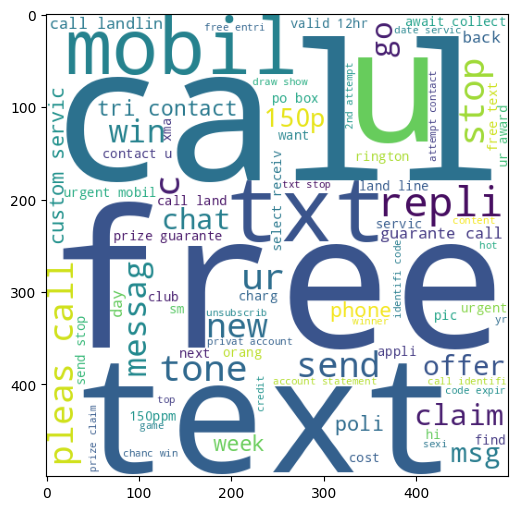

In [46]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [47]:
# Generating text when label is 'ham'
ham_wc = wc.generate(df[df['label'] == 0]['transformed_text'].str.cat(sep=" "))

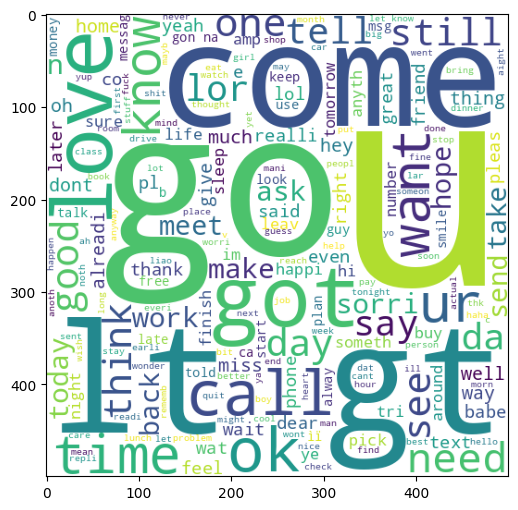

In [48]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [49]:
df.head()

,label,message,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61,15,1,nah think goe usf live around though


In [50]:
# Cleaning and storing spam sentances in list

spam_corpus = []
for msg in df[df['label'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        word = re.sub('[^a-zA-Z]', ' ', word)     # Except 'a-zA-Z' it will remove all
        spam_corpus.append(word)

In [51]:
len(spam_corpus)

9939

In [53]:
# Cleaning and storing ham sentances in list
ham_corpus = []
for msg in df[df['label'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        word = re.sub('[^a-zA-Z]', ' ', word)     # Except 'a-zA-Z' it will remove all
        ham_corpus.append(word)

In [54]:
len(ham_corpus)

35404

## Model Building
We will test our dataset with SVM and Naive Bayes as they works well with textual data.

In [55]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [56]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [57]:
X.shape

(5169, 3000)

In [58]:
y = df['label'].values

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [61]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [62]:
GaussianNB      ##  used when features are not discreet.
MultinomialNB   ##  used when features follow a multinomial distribution.
BernoulliNB     ##  used when features are of the boolean type.

sklearn.naive_bayes.BernoulliNB

#### Report:
- As our feature have values in array form(0/1) and there was no boolean value we won't proceed with GaussianNB and BernoulliNB
- There are multiple columns on which the output label is dependent, so we will go with MultinomialNB

In [69]:
from sklearn.svm import SVC

# Define models
svc = SVC(kernel='sigmoid', gamma=1.0)
mnb = MultinomialNB()
gnb = GaussianNB()

In [70]:
clfs = {
    'SVC' : svc,
    'MNB': mnb,
    'gnb':gnb
}

In [71]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [72]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [73]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  MNB
Accuracy -  0.9709864603481625
Precision -  1.0
For  gnb
Accuracy -  0.8694390715667312
Precision -  0.5068493150684932
